In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('hospital_readmissions.csv')

In [5]:
# One-hot encoding categorical variables
data_encoded = pd.get_dummies(data, columns=[
    'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med'
], drop_first=True)
data_encoded

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted,age_[50-60),age_[60-70),...,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes
0,8,72,1,18,2,0,0,no,0,0,...,0,0,1,0,1,0,1,0,0,1
1,3,34,2,13,0,0,0,no,0,0,...,0,0,1,0,1,0,1,0,0,1
2,5,45,0,18,0,0,0,yes,1,0,...,0,0,0,0,1,0,1,0,1,1
3,2,36,0,12,1,0,0,yes,0,0,...,0,0,0,0,1,0,1,0,1,1
4,1,42,0,7,0,0,0,no,0,1,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,yes,0,0,...,0,0,0,0,1,0,0,1,0,0
24996,2,66,0,24,0,0,0,yes,0,0,...,0,0,1,0,1,0,0,0,1,1
24997,5,12,0,6,0,1,0,yes,0,0,...,0,0,1,0,0,1,1,0,0,0
24998,2,61,3,15,0,0,0,no,0,0,...,0,0,1,0,1,0,1,0,1,1


In [6]:
# Mapping the target column "readmitted" to binary values
data_encoded['readmitted'] = data_encoded['readmitted'].map({'no': 0, 'yes': 1})

In [7]:
# Splitting the dataset into features (X) and target (y)
X = data_encoded.drop('readmitted', axis=1)
y = data_encoded['readmitted']

In [8]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Applying logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predicting on the test set
y_pred = log_reg.predict(X_test)

In [12]:
# Evaluating the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6086666666666667

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [14]:
# Classification report
class_report = classification_report(y_test, y_pred)

In [15]:
# Output the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6086666666666667
Confusion Matrix:
 [[3116  884]
 [2051 1449]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      4000
           1       0.62      0.41      0.50      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.59      7500
weighted avg       0.61      0.61      0.59      7500



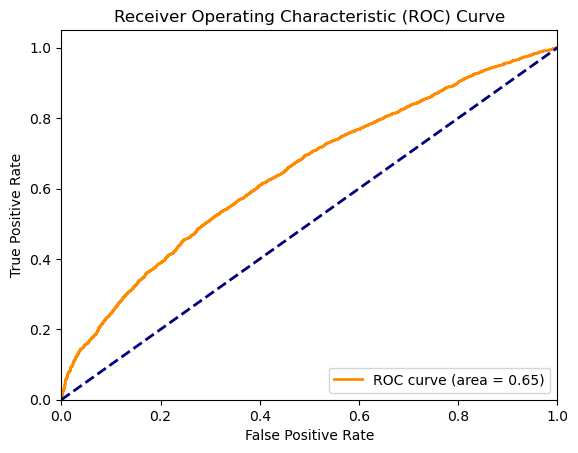

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression

# Apply logistic regression with L2 regularization (default)
log_reg_l2 = LogisticRegression(max_iter=1000, penalty='l2', C=10)  # 'C' controls regularization strength
log_reg_l2.fit(X_train, y_train)

# Predicting on the test set
y_pred_l2 = log_reg_l2.predict(X_test)

# Evaluate the model
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
class_report_l2 = classification_report(y_test, y_pred_l2)

print("L2 Regularization - Accuracy:", accuracy_l2)
print("Confusion Matrix:\n", conf_matrix_l2)
print("Classification Report:\n", class_report_l2)

L2 Regularization - Accuracy: 0.6085333333333334
Confusion Matrix:
 [[3111  889]
 [2047 1453]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      4000
           1       0.62      0.42      0.50      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.59      7500
weighted avg       0.61      0.61      0.59      7500



In [24]:
print(y_train.value_counts())

0    9246
1    8254
Name: readmitted, dtype: int64


Class distribution in training set:
 0    9246
1    8254
Name: readmitted, dtype: int64
Best parameters found:  {'C': 1, 'penalty': 'l2'}
Accuracy: 0.6093333333333333
Confusion Matrix:
 [[3116  884]
 [2046 1454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      4000
           1       0.62      0.42      0.50      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.59      7500
weighted avg       0.61      0.61      0.60      7500



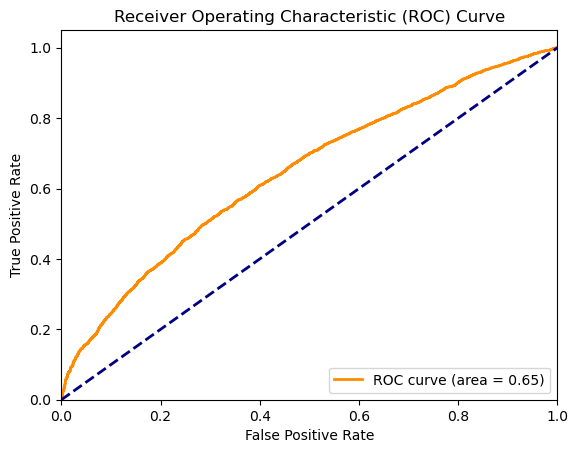

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Step 1: Check for class imbalance
print("Class distribution in training set:\n", y_train.value_counts())

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Hyperparameter tuning for regularization strength
# Define the parameter grid for C
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Logistic Regression with GridSearchCV
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best estimator
print("Best parameters found: ", grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

# Step 4: Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Step 5: Plot ROC curve
y_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

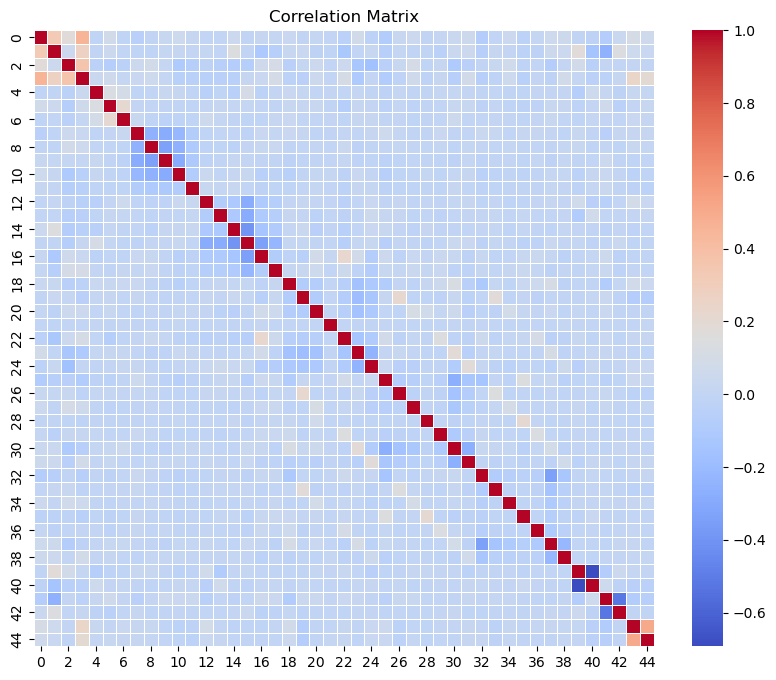

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = np.corrcoef(X_train_scaled.T)

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

AttributeError: 'Flags' object has no attribute 'c_contiguous'